# Homework 3 - ASTRO 530 - Olivier Gilbert

## 1.

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
plt.rcParams["font.family"] = "Times New Roman"
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['text.usetex'] = False
plt.rc("axes", labelsize=16) 

def mass_growth(M_0, t, beta):
    """M(t) = M_0/(1-\beta M_0 t) where \beta M_0 t<<1"""
    return M_0/(1-beta*M_0*t)

### a)

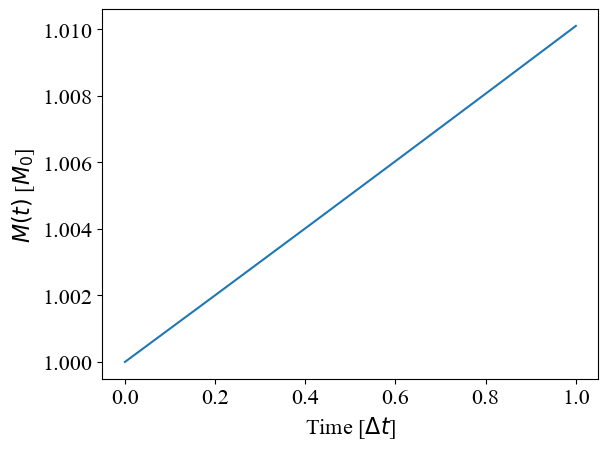

In [33]:
M_0 = 1 # in units of M_0
t = np.linspace(0,1,1000) # in units of Delta t
beta = 1E-2 # in units of (M_0*Delta t)^-1
plt.plot(t,mass_growth(M_0,t,beta))
plt.xlabel(r"Time [$\Delta t$]")
plt.ylabel(r"$M(t)$ [$M_0$]")
plt.show()

### b)

$$\beta = \frac{2\pi G^2 \rho_0}{\left(c_{s,0}^2 + v_0^2\right)^{3/2}}$$

Assuming the characteristic flow velocity $v_0$ is zero and characteristic values for molecular clouds ($\mathrm{H}_2$, $n=10^2\mathrm{cm^{-3}}$, $T=10\mathrm{K}$), we can calculate $\beta$ in [$M_\odot^{-1}\mathrm{Myr^{-1}}$] :

$$\rho_0 = n\cdot m_{\mathrm{H}_2} \quad \quad m_{\mathrm{H}_2} = 3.34\times10^{-24}\mathrm{g}$$